In [1]:
import pandas as pd
!pip install pandas matplotlib seaborn sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print('import')

import


In [2]:
path = r'C:\Users\Oviya\OneDrive\Desktop\Amazon sales analysis\Amazon_analysis_Complete.csv'
eda= pd.read_csv(path)
print("done")

done


In [7]:
eda.columns

Index(['Transaction Id', 'Order Date', 'Customer Id', 'Product Id',
       'Product Name', 'Category', 'Subcategory', 'Brand',
       'Original Price Inr', 'Discount Percent', 'Discounted Price Inr',
       'Quantity', 'Subtotal Inr', 'Delivery Charges', 'Final Amount Inr',
       'Customer City', 'Customer State', 'Customer Tier',
       'Customer Spending Tier', 'Customer Age Group', 'Payment Method',
       'Delivery Days', 'Delivery Type', 'Is Prime Member', 'Is Festival Sale',
       'Festival Name', 'Customer Rating', 'Return Status', 'Order Month',
       'Order Year', 'Order Quarter', 'Product Weight Kg', 'Is Prime Eligible',
       'Product Rating'],
      dtype='object')

In [ ]:
#counts how many times each value appears
eda['Delivery Charges'].value_counts()

Delivery Charges
0.0     1037400
40.0          8
Name: count, dtype: int64

C:\Users\Oviya\AppData\Local\Temp\ipykernel_24152\1179622564.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


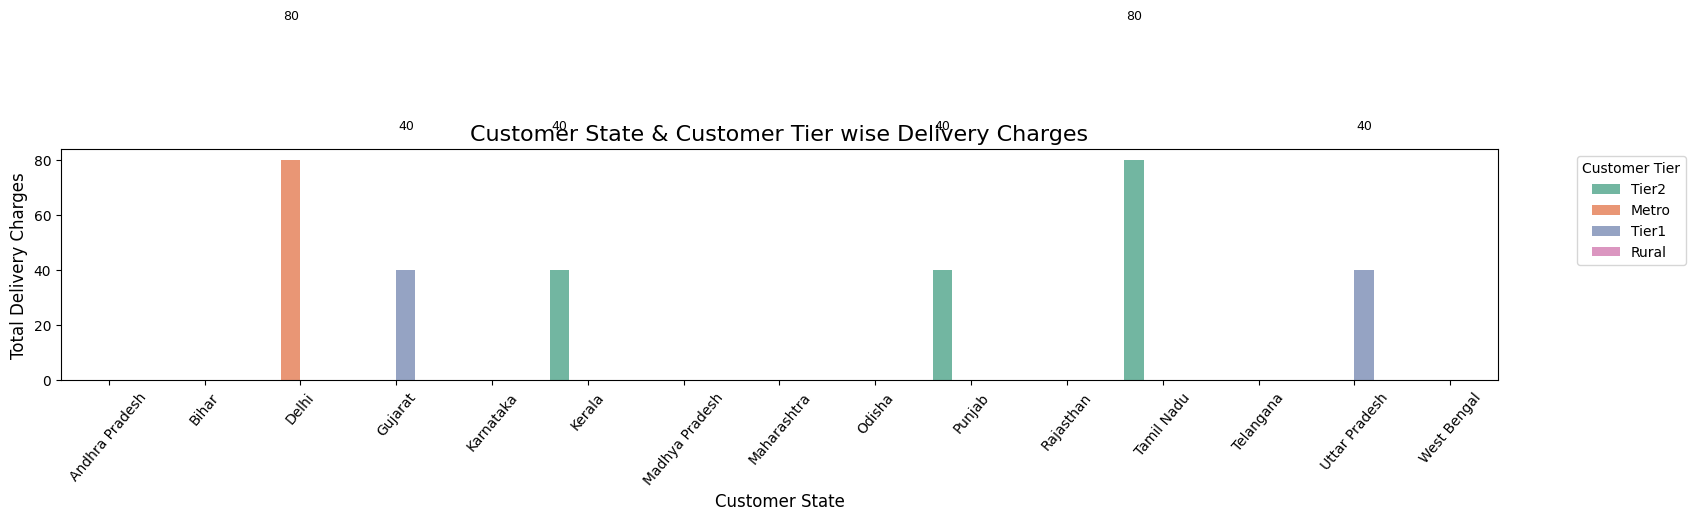

In [ ]:
#plots total delivery charges by customer state and tier, using a bar chart with different colors for each tier and annotated values on top of the bars.


# Grouping and summing delivery charges
delivery_charge = eda.groupby(['Customer State', 'Customer Tier'], as_index=False)['Delivery Charges'].sum()

plt.figure(figsize=(17,7))

# Plotting a barplot with hue for Customer Tier
sns.barplot(
    data=delivery_charge,
    x='Customer State',
    y='Delivery Charges',
    hue='Customer Tier',
    palette='Set2',
    ci=None
)

# Adding annotations on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            x=p.get_x() + p.get_width()/2, 
            y=height + 50,  # adjust offset
            s=f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title("Customer State & Customer Tier wise Delivery Charges", fontsize=16)
plt.xlabel("Customer State", fontsize=12)
plt.ylabel("Total Delivery Charges", fontsize=12)
plt.xticks(rotation=50)
plt.legend(title="Customer Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


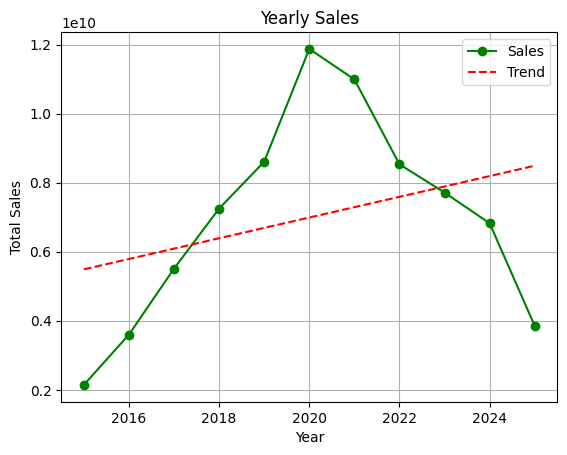

In [8]:
#plots yearly total sales with a growth trend: a green line shows actual sales per year, and a red dashed line shows the overall trend. It also calculates year-over-year growth percentage.

yearly_sales = eda.groupby('Order Year')['Final Amount Inr'].sum().reset_index()
yearly_sales['Growth %'] = yearly_sales['Final Amount Inr'].pct_change() * 100

plt.plot(yearly_sales['Order Year'], yearly_sales['Final Amount Inr'], 'go-', label='Sales')
plt.plot(yearly_sales['Order Year'], np.poly1d(np.polyfit(yearly_sales['Order Year'], yearly_sales['Final Amount Inr'], 1))(yearly_sales['Order Year']), 'r--', label='Trend')
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Oviya\AppData\Local\Temp\ipykernel_24152\1134557011.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Order Month', y='Final Amount Inr', palette='viridis')


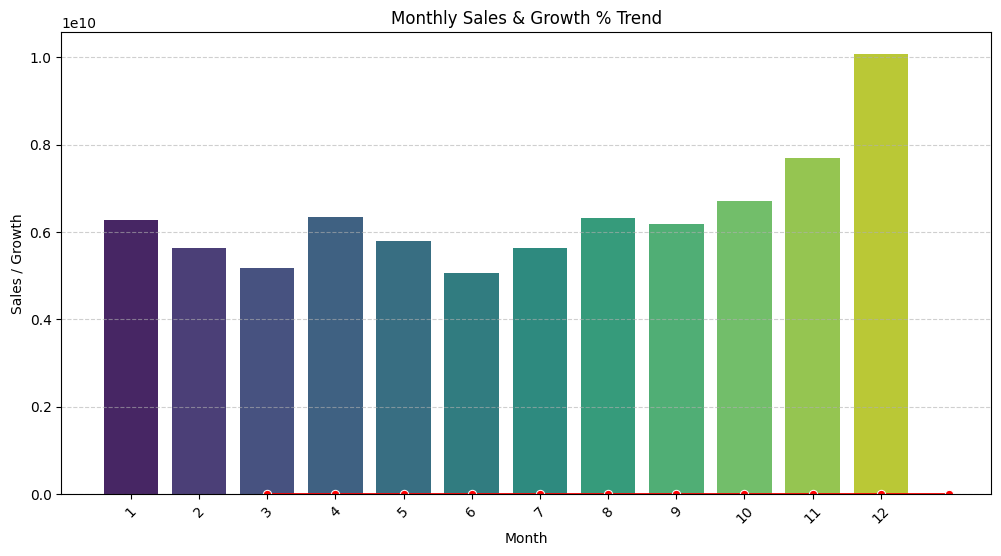

In [9]:
#Bar chart shows monthly sales.
#Red line shows month-to-month growth %.
#Combines sales and growth trends in one plot.
# Group by month and sum sales
monthly_sales = eda.groupby('Order Month', as_index=False)['Final Amount Inr'].sum()

# Calculate month-to-month growth percentage
monthly_sales['Growth %'] = monthly_sales['Final Amount Inr'].pct_change() * 100

# Plotting
plt.figure(figsize=(12,6))

# Bar plot for sales
sns.barplot(data=monthly_sales, x='Order Month', y='Final Amount Inr', palette='viridis')

# Overlay line plot for growth %
sns.lineplot(data=monthly_sales, x='Order Month', y='Growth %', color='red', marker='o', linewidth=2)

plt.title("Monthly Sales & Growth % Trend")
plt.ylabel("Sales / Growth")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


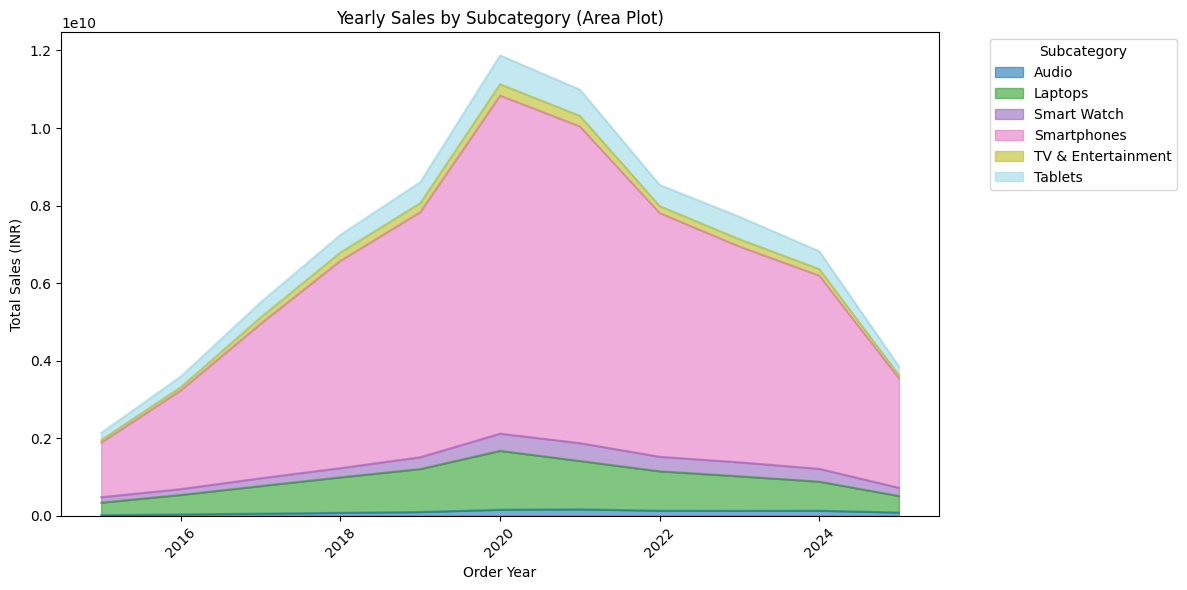

In [ ]:
#Shows the yearly sales trends for each product subcategory, highlighting how each contributes to total sales over time.


group_by = eda.groupby(['Order Year', 'Subcategory'], as_index=False)['Final Amount Inr'].sum()
pivot_df = group_by.pivot(index='Order Year', columns='Subcategory', values='Final Amount Inr').fillna(0)

pivot_df.plot(kind='area', figsize=(12,6), alpha=0.6, colormap='tab20')
plt.title("Yearly Sales by Subcategory (Area Plot)")
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.legend(title="Subcategory", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


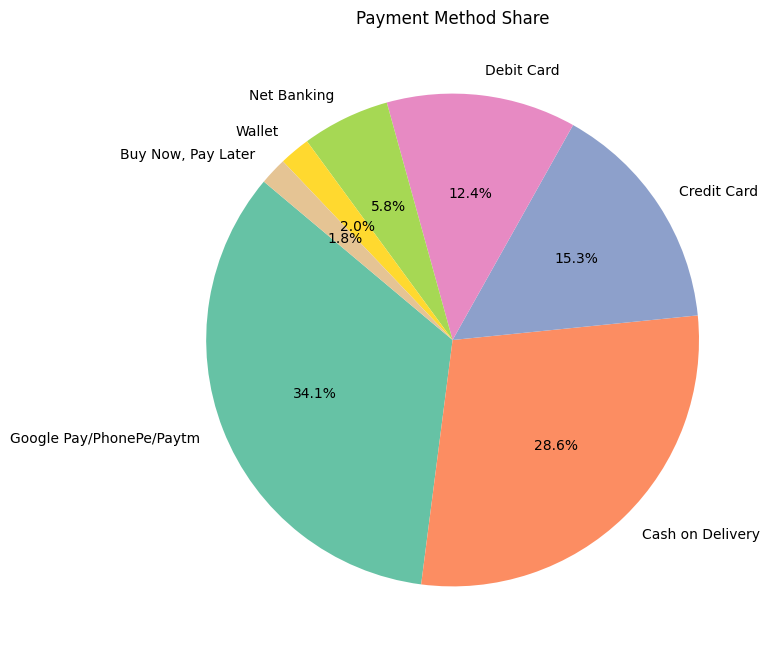

In [ ]:
#creates a pie chart showing the proportion of each payment method in the dataset
#Each slice represents a payment method, and the percentage on the slice indicates its share of total orders.

payment_counts = eda['Payment Method'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Payment Method Share")
plt.show()


C:\Users\Oviya\AppData\Local\Temp\ipykernel_24152\1333604688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eda, x='Subcategory', y='Final Amount Inr', palette='Set3')


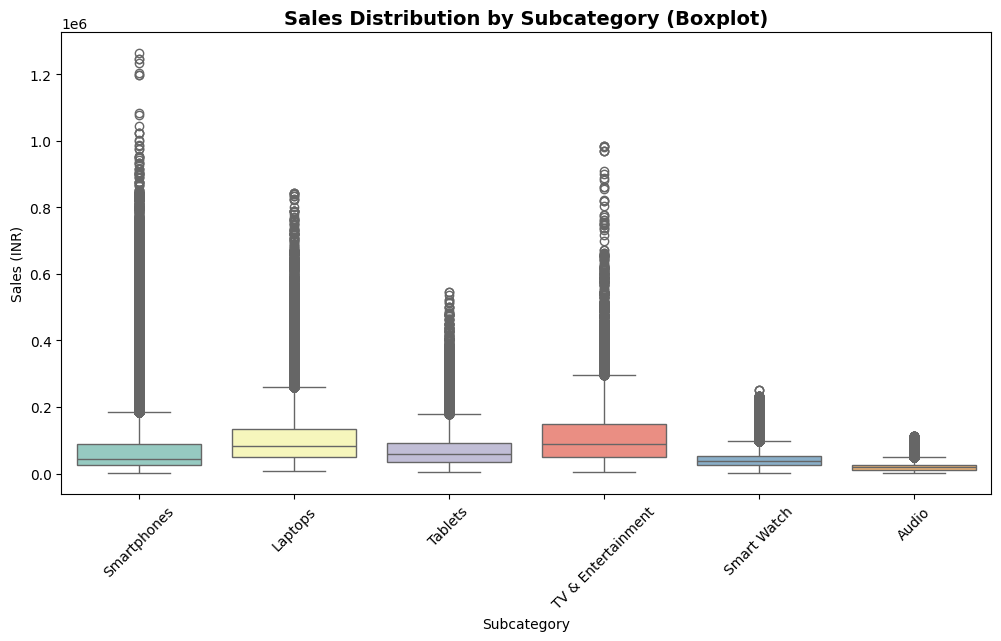

In [ ]:
#boxplot shows the spread and range of sales for each subcategory, highlighting medians, quartiles, and potential outliers in sales.

plt.figure(figsize=(12,6))
sns.boxplot(data=eda, x='Subcategory', y='Final Amount Inr', palette='Set3')
plt.xticks(rotation=45)
plt.title("Sales Distribution by Subcategory (Boxplot)", fontsize=14, fontweight='bold')
plt.xlabel("Subcategory")
plt.ylabel("Sales (INR)")
plt.show()


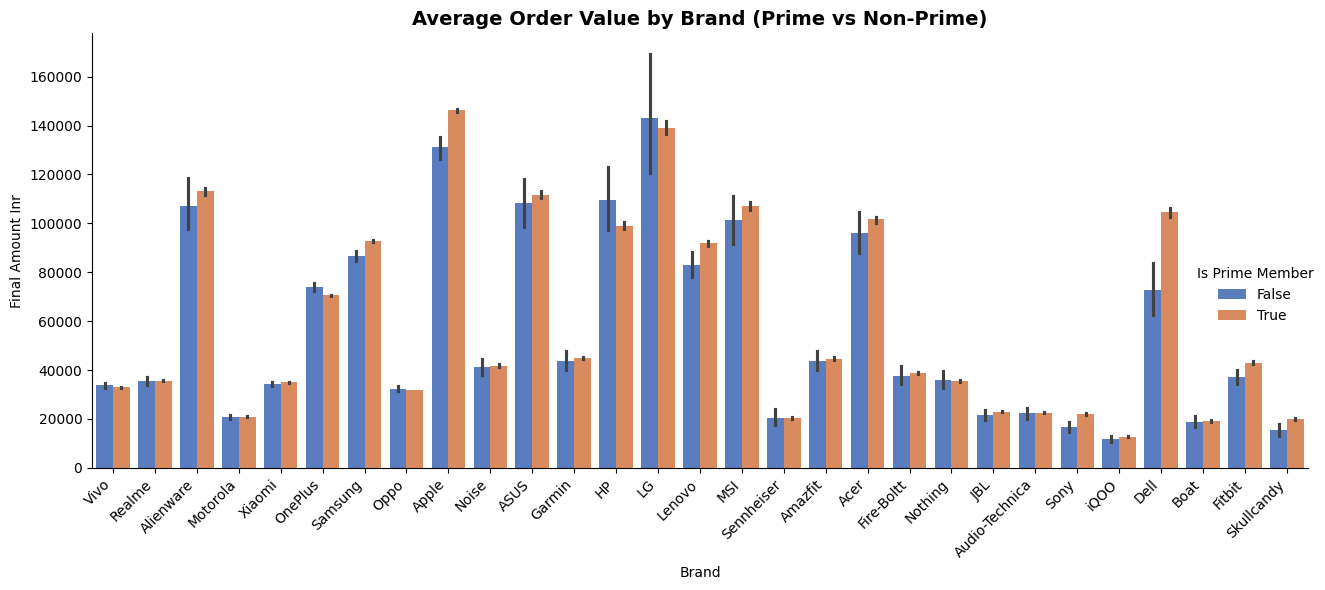

In [ ]:
#catplot makes it easy to compare Prime vs Non-Prime spending for each brand using grouped bars.
sns.catplot(
    data=eda, 
    x='Brand', 
    y='Final Amount Inr', 
    hue='Is Prime Member', 
    kind='bar', 
    height=6, 
    aspect=2, 
    palette='muted'
)
plt.title("Average Order Value by Brand (Prime vs Non-Prime)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


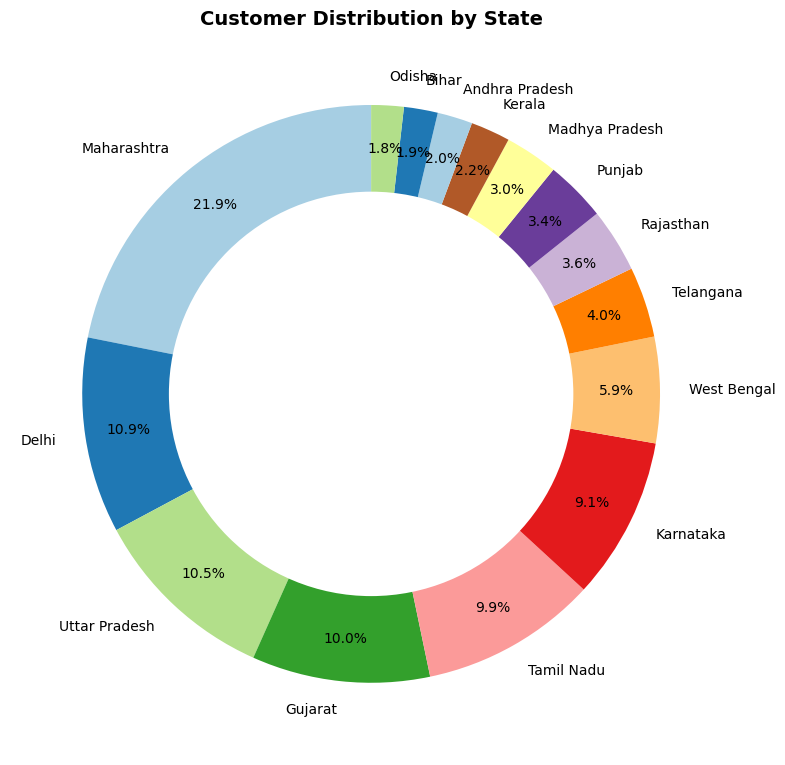

In [ ]:
#Like a pie chart but with a center hole — gives a cleaner, modern look.
state_counts = eda['Customer State'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette('Paired'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Customer Distribution by State", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


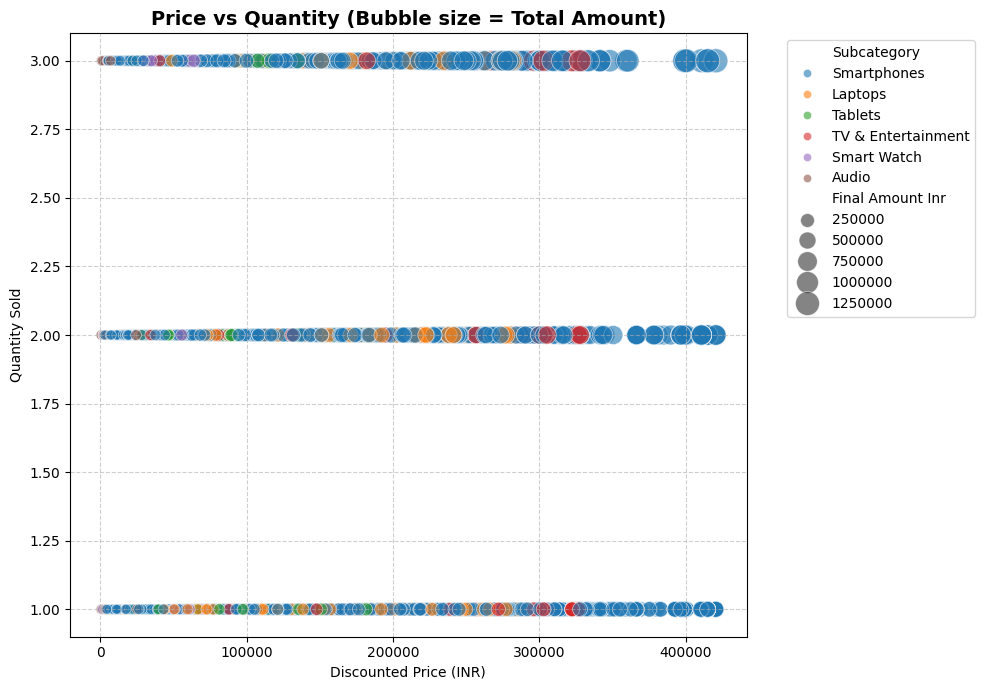

In [ ]:
#Shows how price and demand vary by subcategory, with bubble size showing sales value.

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=eda, 
    x='Discounted Price Inr', 
    y='Quantity', 
    hue='Subcategory', 
    size='Final Amount Inr', 
    alpha=0.6, 
    sizes=(50,300)
)
plt.title("Price vs Quantity (Bubble size = Total Amount)", fontsize=14, fontweight='bold')
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Quantity Sold")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


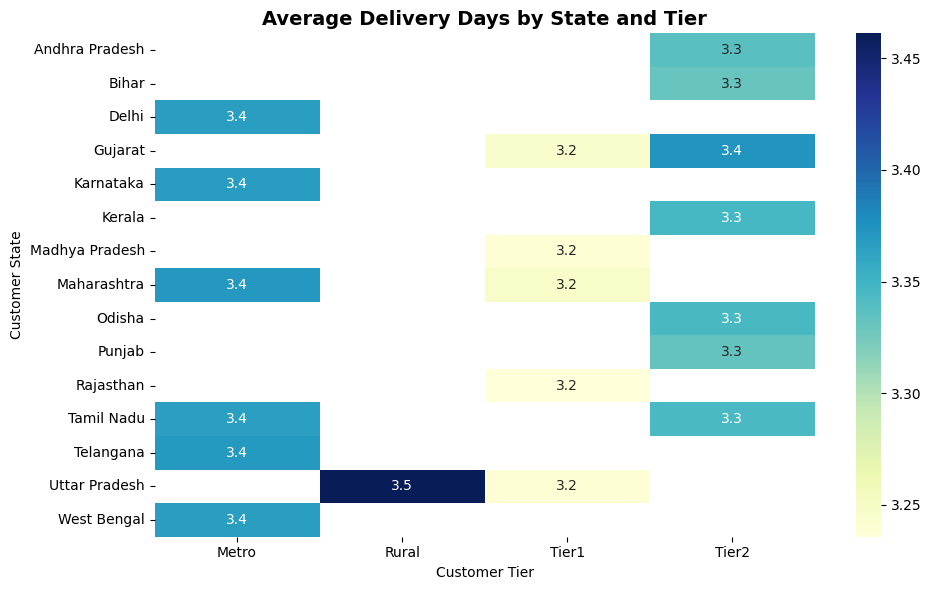

In [ ]:
#Each cell’s color shows average delivery time — lighter = faster, darker = slower. Great for spotting patterns quickly.
pivot = eda.pivot_table(index='Customer State', columns='Customer Tier', values='Delivery Days', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Average Delivery Days by State and Tier", fontsize=14, fontweight='bold')
plt.xlabel("Customer Tier")
plt.ylabel("Customer State")
plt.tight_layout()
plt.show()


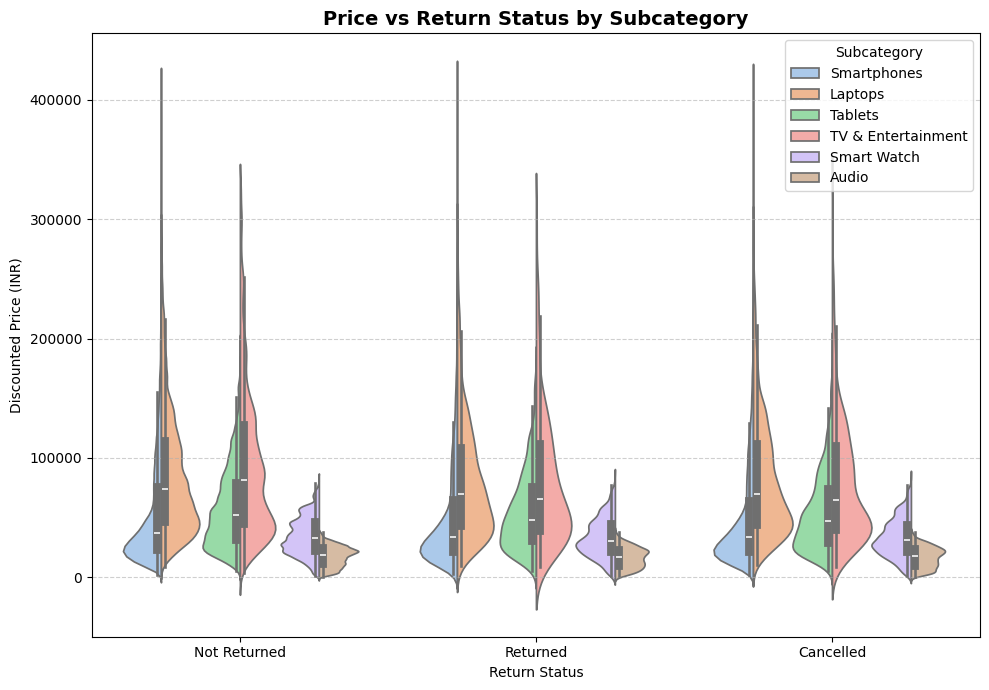

In [9]:
plt.figure(figsize=(10,7))
sns.violinplot(data=eda, x='Return Status', y='Discounted Price Inr', hue='Subcategory', split=True, palette='pastel')
plt.xticks([0,1,2], ["Not Returned", "Returned", "Cancelled"])
plt.title("Price vs Return Status by Subcategory", fontsize=14, fontweight='bold')
plt.xlabel("Return Status")
plt.ylabel("Discounted Price (INR)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


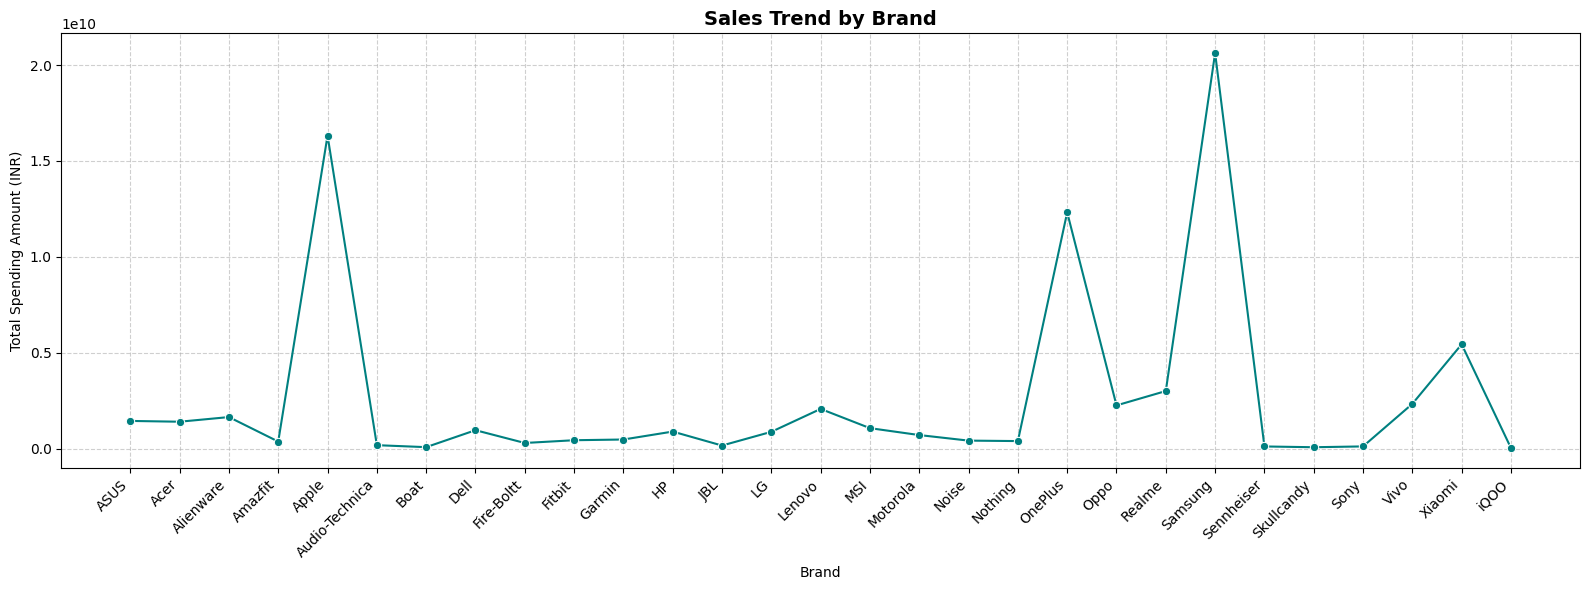

In [ ]:
#Shows how sales vary from brand to brand — looks sleek and easy to compare.

plt.figure(figsize=(16,6))
sns.lineplot(data=eda.groupby('Brand', as_index=False)['Final Amount Inr'].sum(), x='Brand', y='Final Amount Inr', marker='o', color='teal')
plt.title("Sales Trend by Brand", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Total Spending Amount (INR)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


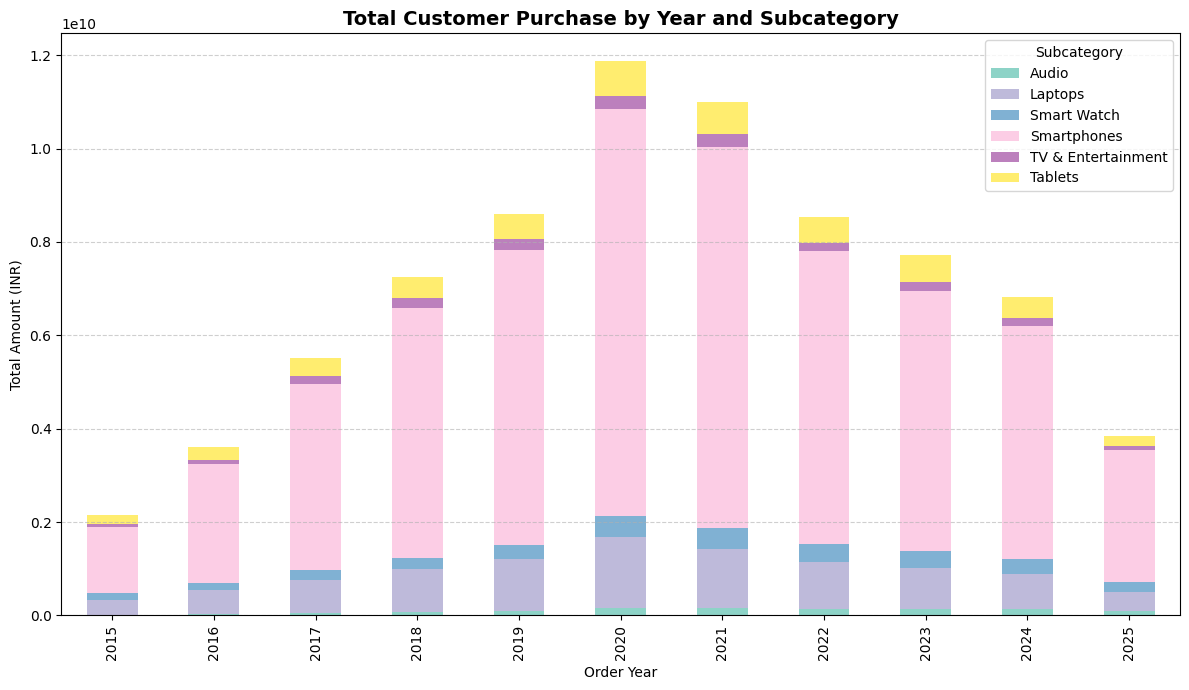

In [ ]:
#Shows both total yearly sales and how each subcategory contributes — very clear for presentations.

sales = eda.groupby(['Order Year', 'Subcategory'])['Final Amount Inr'].sum().unstack().fillna(0)
sales.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,7), 
    colormap='Set3'
)
plt.title("Total Customer Purchase by Year and Subcategory", fontsize=14, fontweight='bold')
plt.xlabel("Order Year")
plt.ylabel("Total Amount (INR)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Oviya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


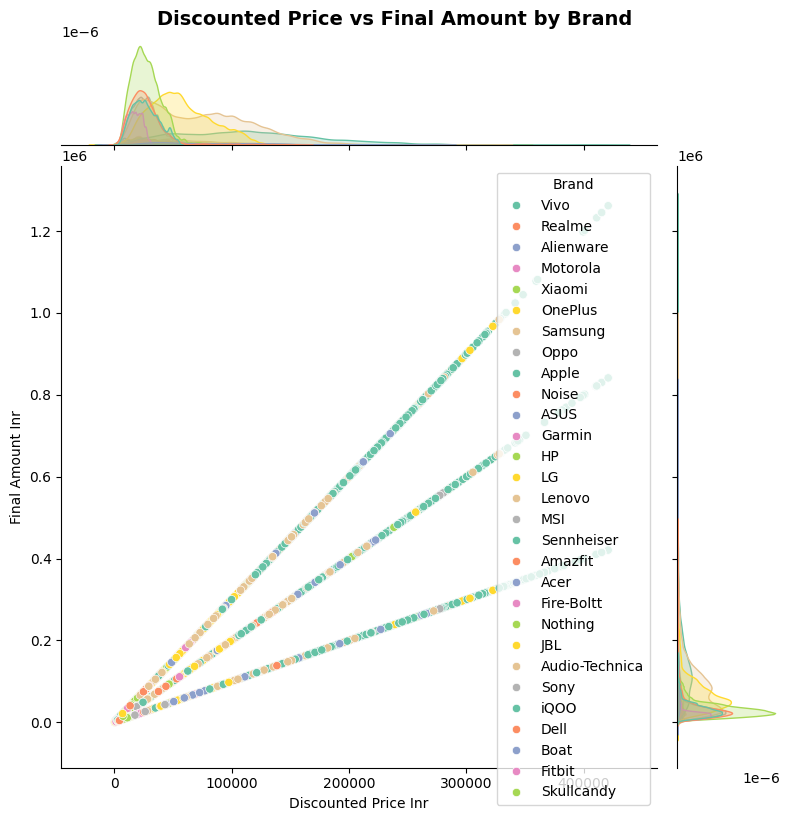

In [ ]:
#Shows scatter with marginal histograms, giving insight into distribution along each axis.
sns.jointplot(
    data=eda,
    x='Discounted Price Inr',
    y='Final Amount Inr',
    hue='Brand',
    kind='scatter',
    height=8,
    palette='Set2'
)
plt.suptitle("Discounted Price vs Final Amount by Brand", fontsize=14, fontweight='bold', y=1.02)
plt.show()


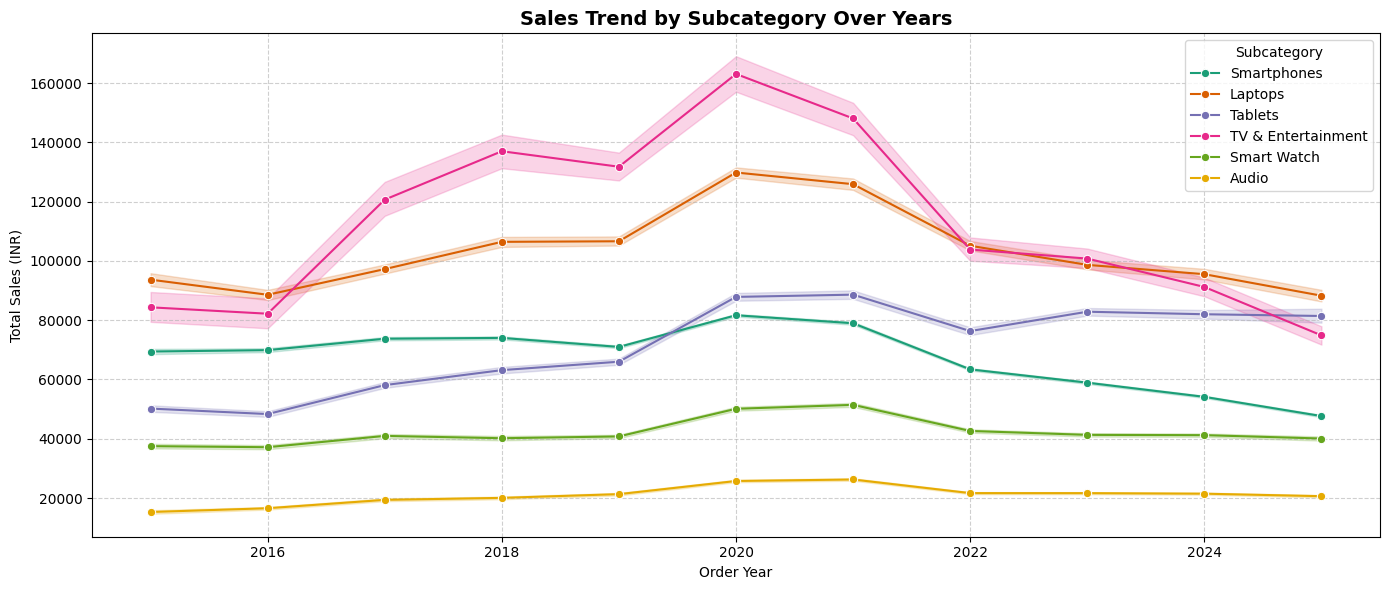

In [18]:
plt.figure(figsize=(14,6))
sns.lineplot(
    data=eda,
    x='Order Year',
    y='Final Amount Inr',
    hue='Subcategory',
    marker='o',
    palette='Dark2'
)
plt.title("Sales Trend by Subcategory Over Years", fontsize=14, fontweight='bold')
plt.xlabel("Order Year")
plt.ylabel("Total Sales (INR)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
